# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("auto-mpg.csv",  na_values = "?", comment = "\t", skipinitialspace = True)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
data.drop(labels="car name", axis=1, inplace=True)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [4]:
data = data.rename(columns = {"mpg":"target"})

data.head()

,target,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [5]:
print("Data shape: ",data.shape)

Data shape:  (398, 8)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
target          398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [7]:
data.describe()

,target,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Missing Values

In [8]:
data.isna().sum() # check the missing values

target          0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

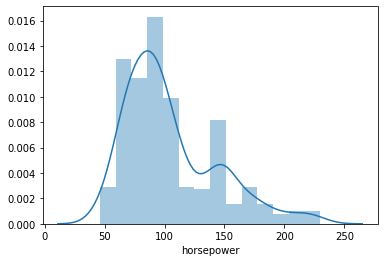

In [9]:
sns.distplot(data.horsepower)

target          0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


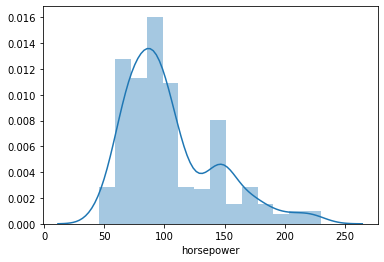

In [10]:
data["horsepower"] = data["horsepower"].fillna(data["horsepower"].mean()) 

print(data.isna().sum())

sns.distplot(data.horsepower)

# Exploratory Data Analysis (EDA)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 936x936 with 0 Axes>

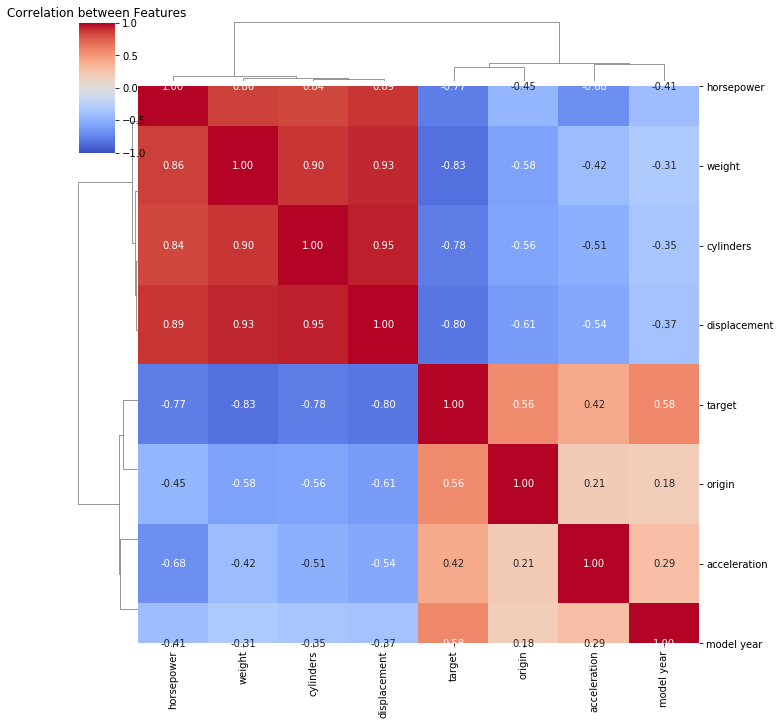

In [11]:
corr_matrix = data.corr()

plt.figure(figsize=(13,13))
sns.clustermap(corr_matrix, annot=True, fmt = ".2f", cmap= 'coolwarm', vmin=-1, vmax=1, dendrogram_ratio=0.1)
plt.title("Correlation between Features")
plt.show

<Figure size 936x936 with 0 Axes>

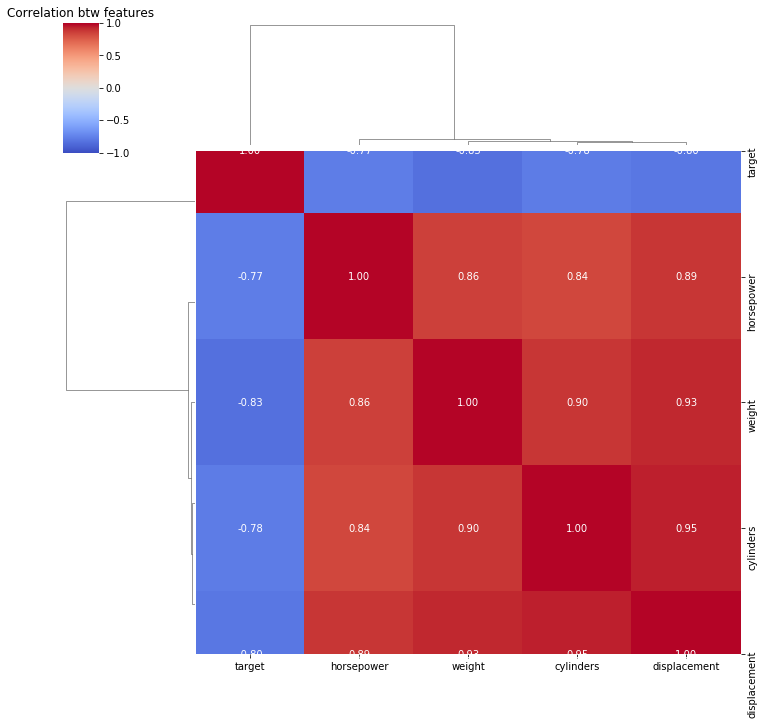

In [12]:
threshold = 0.75

filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()

plt.figure(figsize=(13,13))
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f", cmap= 'coolwarm', vmin=-1, vmax=1)
plt.title("Correlation btw features")
plt.show()

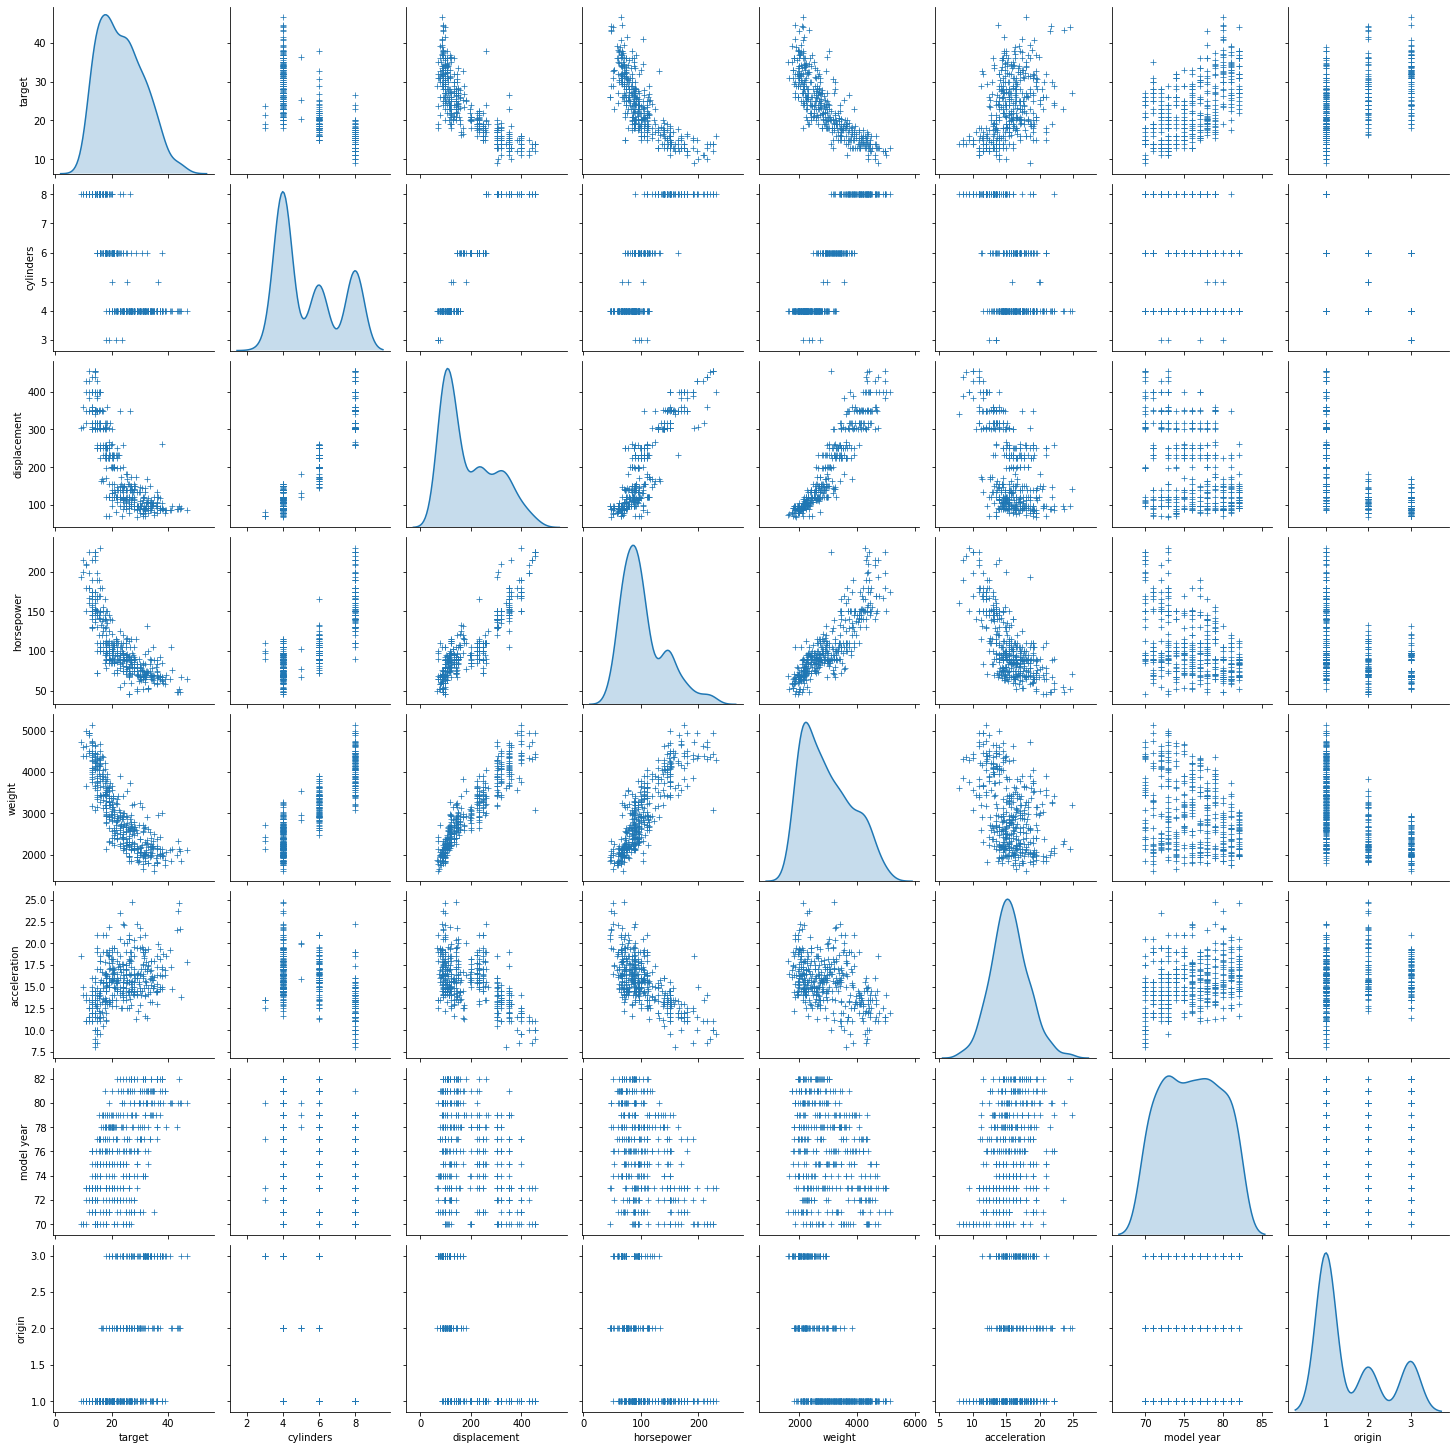

In [13]:
sns.pairplot(data, diag_kind="kde", markers="+")
plt.show()

## cylinders and origin can be categorical (feature engineering)

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


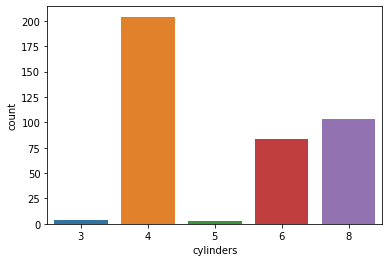

In [14]:
plt.figure()

sns.countplot(data["cylinders"])

print(data["cylinders"].value_counts())

1    249
3     79
2     70
Name: origin, dtype: int64


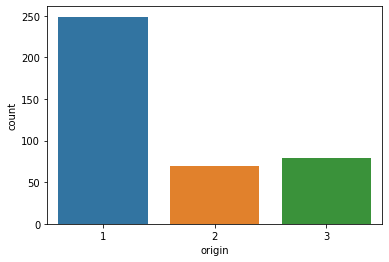

In [15]:
plt.figure()

sns.countplot(data["origin"])

print(data["origin"].value_counts())

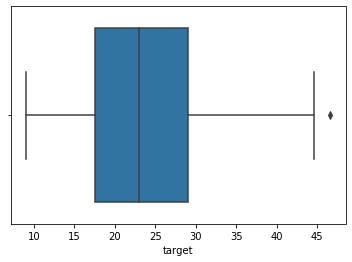

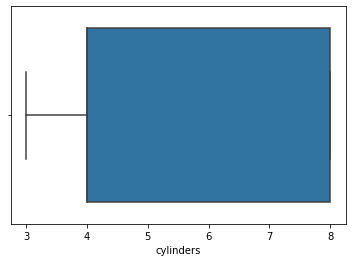

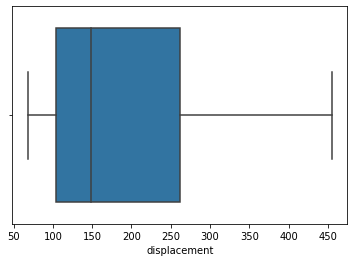

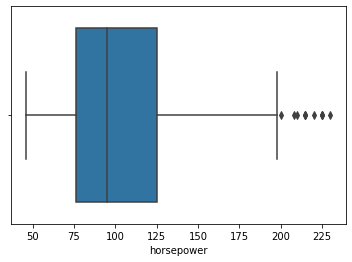

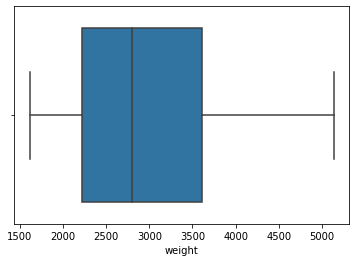

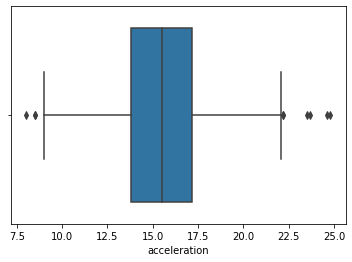

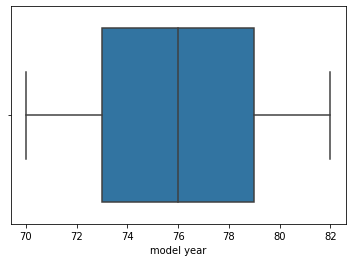

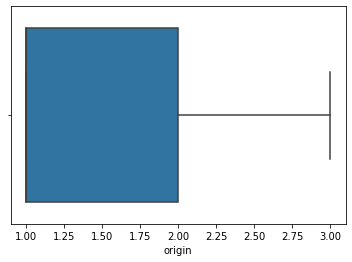

In [16]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x=c, data=data, orient="h")

# Outlier

In [17]:
describe = data.describe()

thr = 2

horsepower_desc = describe["horsepower"]

horsepower_desc

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

### I need to reach %75 anf %25 for calculating IQR

### Q3 = %75
### Q1 = %25

In [18]:
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]

IQR_hp = q3_hp - q1_hp

top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp

filter_hp_bottom = bottom_limit_hp < data["horsepower"]
filter_hp_top = data["horsepower"] < top_limit_hp

filter_hp = filter_hp_bottom & filter_hp_top

data = data[filter_hp]

data.shape

(394, 8)

In [19]:
acceleration_desc = describe["acceleration"]

q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]

IQR_acc = q3_acc - q1_acc

top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc

filter_acc_bottom = bottom_limit_acc < data["acceleration"]
filter_acc_top = data["acceleration"] < top_limit_acc

filter_acc = filter_acc_bottom & filter_acc_top

data = data[filter_acc]

data.shape

(392, 8)

# Feature Engineering

## Skewness

### target dependent variable

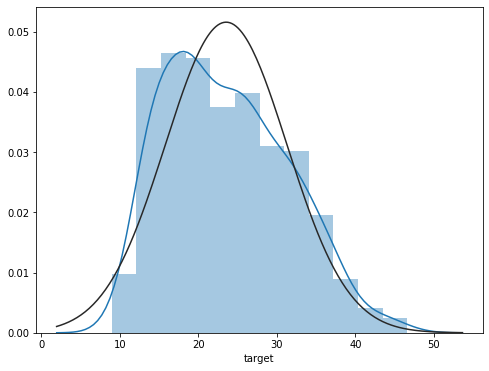

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(data.target, fit=norm)

In [21]:
(mu, sigma) = norm.fit(data["target"])

print("mu: {} sigma: {}".format(mu,sigma)) #(Mu: mean, sigma: std)

mu: 23.55 sigma: 7.7342235735537335


### QQ Plot

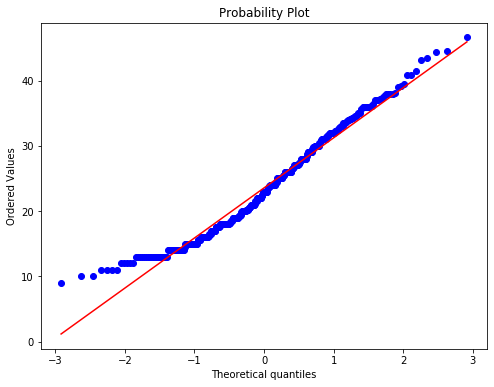

In [22]:
plt.figure(figsize=(8,6))

stats.probplot(data["target"], plot=plt)
plt.show()

## Log Transform

In [23]:
data["target"] = np.log1p(data["target"])

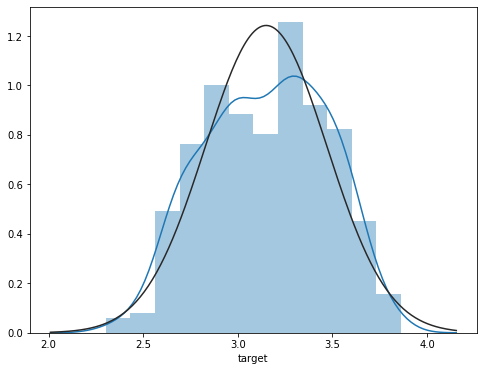

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(data.target, fit=norm)

In [25]:
(mu, sigma) = norm.fit(data["target"])

print("mu: {} sigma: {}".format(mu,sigma)) #(Mu: mean, sigma: std)

mu: 3.150194394612899 sigma: 0.32111064266913925


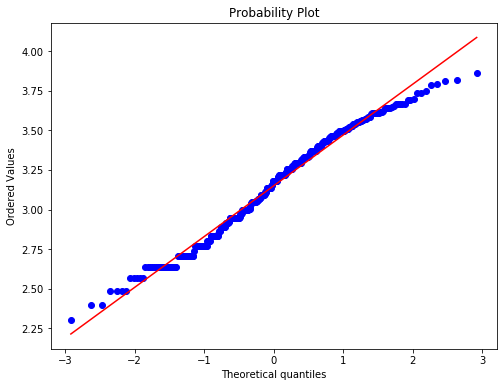

In [26]:
plt.figure(figsize=(8,6))

stats.probplot(data["target"], plot=plt)
plt.show()

### Features - independent variable

In [27]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

skewness = pd.DataFrame(skewed_feats, columns =["skewed"])

skewness

,skewed
horsepower,0.997460
origin,0.911679
displacement,0.695857
cylinders,0.543555
weight,0.534367
acceleration,0.190781
model year,0.005678
target,-0.127043


## One Hot Encoding

### Cylinder and Origin

In [28]:
data["cylinders"] = data["cylinders"].astype(str)
data["origin"] = data["origin"].astype(str)

data = pd.get_dummies(data)

data.head()

,target,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,2.944439,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0


# Preprocessing

## Train Test Split

In [29]:
x = data.drop(["target"], axis = 1)
y = data.target

x.head()

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0


In [30]:
test_size = 0.9
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= test_size, random_state = 42)

## Standardization

In [31]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression Models

## Linear Regression

In [32]:
lr = LinearRegression()

lr.fit(X_train, y_train)

print("LR COEF: ",lr.coef_)

y_pred_dummy = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dummy)
print("Linear Regression MSE: ",mse)

LR COEF:  [-3.51782924e-02 -2.23385982e-02 -1.26882569e-01 -8.61145750e-03
  1.28419806e-01 -4.85722573e-17  8.03260264e-03 -3.40115606e-02
 -5.06934682e-03  1.91175617e-02 -2.46553976e-02  3.87686592e-02
 -1.44674106e-02]
Linear Regression MSE:  0.015650571603704224


# Regularization 1:  Ridge Regression (L2)

Ridge COEF:  [-0.03600846 -0.02868302 -0.11615984 -0.01137339  0.12534784  0.
  0.01115518 -0.03346621 -0.00690866  0.01634553 -0.0241925   0.03753327
 -0.01356281]
---------------------------------------
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, random_state=42, solver='auto',
      tol=0.001)
Ridge MSE:  0.015444432033230704
---------------------------------------


Text(0.5, 1.0, 'Ridge')

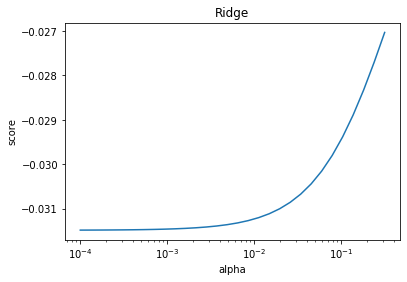

In [33]:
ridge = Ridge(random_state=42, max_iter=10000)

alphas = np.logspace(-4,-0.5,30)

tuned_param = [{"alpha":alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_param, cv=n_folds, scoring="neg_mean_squared_error", refit=True)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge COEF: ",clf.best_estimator_.coef_)

print("---------------------------------------")

ridge = clf.best_estimator_

print("Ridge Best Estimator: ",ridge)

y_pred_dummy = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dummy)
print("Ridge MSE: ",mse)
print("---------------------------------------")

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

# Regularization 2: Lasso Regression (L1)

Lasso Coef:  [-0.         -0.00146856 -0.13531598 -0.          0.09890235  0.
  0.0364134  -0.         -0.         -0.         -0.01453138  0.01804542
  0.        ]
---------------------------------------
Lasso Best Estimator:  Lasso(alpha=0.0196382800192977, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso MSE:  0.014947487693727453
---------------------------------------


Text(0.5, 1.0, 'Lasso')

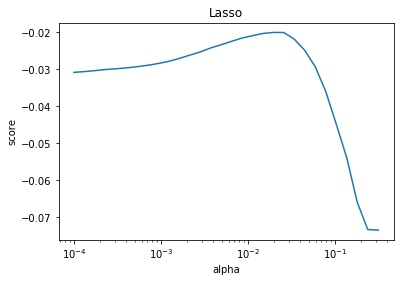

In [34]:
lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print("Lasso Coef: ",clf.best_estimator_.coef_)

print("---------------------------------------")

lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("Lasso MSE: ",mse)
print("---------------------------------------")

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

# Regularization 3: ElasticNet

In [35]:
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, y_train)


print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("---------------------------------------")

print("ElasticNet Best Estimator: ",clf.best_estimator_)

print("---------------------------------------")

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)

ElasticNet Coef:  [-0.         -0.00324851 -0.13137365 -0.          0.09501671  0.
  0.03637542 -0.         -0.         -0.         -0.01661572  0.01422763
  0.        ]
---------------------------------------
ElasticNet Best Estimator:  ElasticNet(alpha=0.02592943797404667, copy_X=True, fit_intercept=True,
           l1_ratio=0.8500000000000001, max_iter=10000, normalize=False,
           positive=False, precompute=False, random_state=42,
           selection='cyclic', tol=0.0001, warm_start=False)
---------------------------------------
ElasticNet MSE:  0.015261633350124886


# XGBoost

In [36]:
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

model_xgb = xgb.XGBRegressor()

clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

clf.fit(X_train, y_train)
model_xgb = clf.best_estimator_


y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("XGBRegressor MSE: ",mse)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    9.3s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:   19.1s finished


XGBRegressor MSE:  0.016814962771534783


# Averaging Models

In [37]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  

In [38]:
averaged_models = AveragingModels(models = (model_xgb, lasso))
averaged_models.fit(X_train, y_train)

In [39]:
y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("Averaged Models MSE: ",mse)

Averaged Models MSE:  0.01427759746361839
